In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [3]:
# helper function, generate lagged datasets for testing on vintages
def gen_lagged_data(metadata, data, last_date, lag):
    # only go up to the last date
    lagged_data = data.loc[data.date <= last_date, :].reset_index(drop=True)
    for col in lagged_data.columns[1:]:
        pub_lag = metadata.loc[metadata.series == col, "months_lag"].values[0] # publication lag of this particular variable
        # go back as far as needed for the pub_lag of the variable, then + the lag (so -2 for 2 months back), also -1 because 0 lag means in month, last month data available, not current month in
        lagged_data.loc[(len(lagged_data) - pub_lag + lag - 1) :, col] = np.nan

    return lagged_data

# helper function, flatten a dataset for methods that don't do timeseries, extra columns for each lag
def flatten_data(data, target_variable, n_lags):
    flattened_data = data.loc[~pd.isna(data[target_variable]), :]
    orig_index = flattened_data.index
    for i in range(1, n_lags + 1):
        lagged_indices = orig_index - i
        lagged_indices = lagged_indices[lagged_indices >= 0]
        tmp = data.loc[lagged_indices, :]
        tmp.date = tmp.date + pd.DateOffset(months=i)
        tmp = tmp.drop([target_variable], axis=1)
        tmp.columns = [j + "_" + str(i) if j != "date" else j for j in tmp.columns]
        flattened_data = flattened_data.merge(tmp, how="left", on="date")

    return flattened_data

# helper function fill missings in a dataset with the mean from the training set
def mean_fill_dataset(training, test):
    mean_dict = {}
    for col in training.columns[1:]:
        mean_dict[col] = np.nanmean(training[col])
    filled = test.copy()
    for col in training.columns[1:]:
        filled.loc[pd.isna(filled[col]), col] = mean_dict[col]
    return filled

# Prepare data

In [9]:
# Load data
data = pd.read_csv('data/data_forecast.csv')
metadata = pd.read_csv('data/metadata.csv')

In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
data.head()

,date,payems,gdpc,cpiaucsl,unrate,houst,indpro,dspic96,cpilfesl,pcepilfe,pcepi,permit,ulcnfb,a261rx1q020sbea,exports
0,1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947-02-01,0.000505,NaN,0.006518,NaN,NaN,0.005902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,0.001148,NaN,0.017576,NaN,NaN,0.005874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059965
3,1947-04-01,-0.002477,NaN,0.000000,NaN,NaN,-0.007784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1947-05-01,0.003195,NaN,-0.002273,NaN,NaN,0.003919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Target variable
target_variable = 'exports' 

In [14]:
# which artificial lags to test the model on, equivalent to number of months ahead of and behind the target date (e.g. 2020-06-01 for Q2 2020)
lags = list(range(-2, 3))

# train and test dates
train_start_date = "1947-01-01"
train_end_date = "2004-12-01"
test_start_date = "2005-03-01"
test_end_date = "2010-12-01"

# train and test datasets
train = data.loc[(data.date >= train_start_date) & (data.date <= train_end_date), :].reset_index(drop=True)
test = data.loc[(data.date >= train_start_date) & (data.date <= test_end_date), :].reset_index(drop=True) # let test set data begin from training 

# Train models

In [99]:
### WORK it OUT
number_lags = 4
data_lag = 
for in in range(1,number_lags):
    data_lag = data.shift(periods=1)

SyntaxError: invalid syntax (3388448113.py, line 3)

In [100]:
noex = transformed_train.drop(['exports'], axis = 1)

In [101]:
data_lag1 = noex.shift(periods=1)
data_lag2 = noex.shift(periods=2)
data_lag3 = noex.shift(periods=3)
data_lag4 = noex.shift(periods=4)

In [102]:
transformed_train = transformed_train.merge(data_lag1, on = 'date', how = 'left', suffixes=('', '_1'))
transformed_train = transformed_train.merge(data_lag2, on = 'date', how = 'left', suffixes=('', '_2'))
transformed_train = transformed_train.merge(data_lag3, on = 'date', how = 'left', suffixes=('', '_3'))
transformed_train = transformed_train.merge(data_lag4, on = 'date', how = 'left', suffixes=('', '_4'))

In [103]:
transformed_train.columns

Index(['date', 'payems', 'gdpc1', 'cpiaucsl', 'unrate', 'houst', 'indpro',
       'dspic96', 'cpilfesl', 'pcepilfe', 'pcepi', 'permit', 'ulcnfb',
       'a261rx1q020sbea', 'exports', 'payems_1', 'gdpc1_1', 'cpiaucsl_1',
       'unrate_1', 'houst_1', 'indpro_1', 'dspic96_1', 'cpilfesl_1',
       'pcepilfe_1', 'pcepi_1', 'permit_1', 'ulcnfb_1', 'a261rx1q020sbea_1',
       'payems_2', 'gdpc1_2', 'cpiaucsl_2', 'unrate_2', 'houst_2', 'indpro_2',
       'dspic96_2', 'cpilfesl_2', 'pcepilfe_2', 'pcepi_2', 'permit_2',
       'ulcnfb_2', 'a261rx1q020sbea_2', 'payems_3', 'gdpc1_3', 'cpiaucsl_3',
       'unrate_3', 'houst_3', 'indpro_3', 'dspic96_3', 'cpilfesl_3',
       'pcepilfe_3', 'pcepi_3', 'permit_3', 'ulcnfb_3', 'a261rx1q020sbea_3',
       'payems_4', 'gdpc1_4', 'cpiaucsl_4', 'unrate_4', 'houst_4', 'indpro_4',
       'dspic96_4', 'cpilfesl_4', 'pcepilfe_4', 'pcepi_4', 'permit_4',
       'ulcnfb_4', 'a261rx1q020sbea_4'],
      dtype='object')

In [104]:
transformed_train.head()

,date,payems,gdpc1,cpiaucsl,unrate,houst,indpro,dspic96,cpilfesl,pcepilfe,...,unrate_4,houst_4,indpro_4,dspic96_4,cpilfesl_4,pcepilfe_4,pcepi_4,permit_4,ulcnfb_4,a261rx1q020sbea_4
0,1947-01-01,0.001609,0.008618,0.003160,0.00149,0.003543,0.002848,0.002967,0.003386,0.00301,...,0.00149,0.003543,0.002848,0.002967,0.003386,0.00301,0.003044,0.003042,0.007722,0.008676
1,1947-02-01,0.000505,0.008618,0.006518,0.00149,0.003543,0.005902,0.002967,0.003386,0.00301,...,0.00149,0.003543,0.005902,0.002967,0.003386,0.00301,0.003044,0.003042,0.007722,0.008676
2,1947-03-01,0.001148,0.008618,0.017576,0.00149,0.003543,0.005874,0.002967,0.003386,0.00301,...,0.00149,0.003543,0.005874,0.002967,0.003386,0.00301,0.003044,0.003042,0.007722,0.008676
3,1947-04-01,-0.002477,0.008618,0.000000,0.00149,0.003543,-0.007784,0.002967,0.003386,0.00301,...,0.00149,0.003543,-0.007784,0.002967,0.003386,0.00301,0.003044,0.003042,0.007722,0.008676
4,1947-05-01,0.003195,0.008618,-0.002273,0.00149,0.003543,0.003919,0.002967,0.003386,0.00301,...,0.00149,0.003543,0.003919,0.002967,0.003386,0.00301,0.003044,0.003042,0.007722,0.008676


In [105]:
# only keep quarterly observations and drop early observations with not enough history for lagged variables
transformed_train = transformed_train.loc[transformed_train.date.dt.month.isin([3,6,9,12]),:].dropna(axis=0, how="any").reset_index(drop=True)


In [106]:
transformed_train.head()

,date,payems,gdpc1,cpiaucsl,unrate,houst,indpro,dspic96,cpilfesl,pcepilfe,...,unrate_4,houst_4,indpro_4,dspic96_4,cpilfesl_4,pcepilfe_4,pcepi_4,permit_4,ulcnfb_4,a261rx1q020sbea_4
0,1947-03-01,0.001148,0.008618,0.017576,0.001490,0.003543,0.005874,0.002967,0.003386,0.00301,...,0.001490,0.003543,0.005874,0.002967,0.003386,0.00301,0.003044,0.003042,0.007722,0.008676
1,1947-06-01,0.003942,-0.002667,0.005923,0.001490,0.003543,0.000007,0.002967,0.003386,0.00301,...,0.001490,0.003543,0.000007,0.002967,0.003386,0.00301,0.003044,0.003042,-0.000125,-0.001236
2,1947-09-01,0.005528,-0.002065,0.019643,0.001490,0.003543,0.007807,0.002967,0.003386,0.00301,...,0.001490,0.003543,0.007807,0.002967,0.003386,0.00301,0.003044,0.003042,0.062293,0.001142
3,1947-12-01,0.002181,0.015643,0.015178,0.001490,0.003543,0.003792,0.002967,0.003386,0.00301,...,0.001490,0.003543,0.003792,0.002967,0.003386,0.00301,0.003044,0.003042,-0.017857,0.009591
4,1948-03-01,0.003368,0.015042,-0.007182,0.052632,0.003543,-0.011242,0.002967,0.003386,0.00301,...,0.052632,0.003543,-0.011242,0.002967,0.003386,0.00301,0.003044,0.003042,0.019142,0.026805


In [107]:
# train 10 models to average outputs because of stochasticity
models = []
for i in range(10):
    model = RandomForestRegressor(n_estimators = 100, criterion = "absolute_error", max_depth = None, min_samples_split = 2, min_samples_leaf = 1)

    
    x = transformed_train.drop(["date", target_variable], axis=1)
    y = transformed_train[target_variable]
    
    model.fit(x, y)
    models.append(model)

# Evaluate performance

In [108]:
# dates in the test set
dates = (
        pd.date_range(test_start_date, test_end_date, freq="3MS")
        .strftime("%Y-%m-%d")
        .tolist()
    )

# actual values
actuals = list(test.loc[test.date.isin(dates), target_variable].values)

In [109]:
pred_dict = {k: [] for k in lags}
for lag in lags:
    for date in dates:
        # the data available for this date at this artificial vintage
        tmp_data = gen_lagged_data(metadata, test, date, lag)

        # get data in format necessary for model
        tmp_data = mean_fill_dataset(train, tmp_data) # fill with the mean of the training set
        tmp_data = flatten_data(tmp_data, target_variable, 4)
        x = tmp_data.loc[tmp_data.date == date, :].drop(["date", target_variable], axis=1)
        
        # average results of 10 models' predictions
        preds = []
        for i in range(10):
            prediction = models[i].predict(x)[0]
            preds.append(prediction)
        
        pred_dict[lag].append(np.nanmean(preds))

# Visualise

In [118]:
# table of RMSE by vintage
performance = pd.DataFrame(columns=["Vintage", "RMSE"])
for lag in lags:
    tmp = pd.DataFrame({
        "Vintage":lag,
        "RMSE":np.sqrt(np.mean((np.array(actuals) - np.array(pred_dict[lag])) ** 2))
    }, index=[0])
    performance = performance.append(tmp).reset_index(drop=True)
performance.round(4)

/var/folders/qr/xym7kmpd1tj07rwt4g32xb0h0000gn/T/ipykernel_17930/2755332237.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance = performance.append(tmp).reset_index(drop=True)
/var/folders/qr/xym7kmpd1tj07rwt4g32xb0h0000gn/T/ipykernel_17930/2755332237.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance = performance.append(tmp).reset_index(drop=True)
/var/folders/qr/xym7kmpd1tj07rwt4g32xb0h0000gn/T/ipykernel_17930/2755332237.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance = performance.append(tmp).reset_index(drop=True)
/var/folders/qr/xym7kmpd1tj07rwt4g32xb0h0000gn/T/ipykernel_17930/2755332237.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas

,Vintage,RMSE
0,-2,0.0428
1,-1,0.0427
2,0,0.0429
3,1,0.0453
4,2,0.0463


''

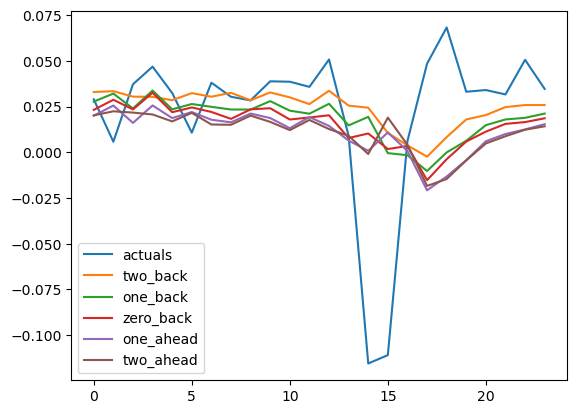

In [119]:
# plot of predictions vs actuals
pd.DataFrame({
    "actuals":actuals, 
    "two_back":pred_dict[-2], 
    "one_back":pred_dict[-1], 
    "zero_back":pred_dict[0],
    "one_ahead":pred_dict[1],
    "two_ahead":pred_dict[2]}
).plot()
;

# Use best model to predict Exports

In [120]:
# the test data ends 2010-12-01, let's say we wanted to predict 2011-03-01
new_data = test.copy()

# the date we want predicted must be in the date, if it's not there it must be added
desired_date = pd.to_datetime("2011-03-01")

while desired_date > np.max(new_data.date):
    new_data.loc[len(new_data), "date"] = np.max(new_data.date) + pd.DateOffset(months=1)

# we can now confirm the date we want to forecast is in the dataframe, even if all values are missing
new_data.tail()

,date,payems,gdpc1,cpiaucsl,unrate,houst,indpro,dspic96,cpilfesl,pcepilfe,pcepi,permit,ulcnfb,a261rx1q020sbea,exports
766,2010-11-01,0.000957,NaN,0.002534,0.042553,0.003683,0.000453,0.000845,0.001438,0.001300,0.001997,0.003584,NaN,NaN,NaN
767,2010-12-01,0.000551,0.005196,0.004017,-0.051020,-0.011009,0.009657,0.005819,0.000873,0.000206,0.002263,0.128571,0.001172,0.002461,0.034628
768,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,2011-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,2011-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
